## Data Analysis Skill Test

- Attached to this test is a .csv file which contains data from Comexstat, which is basically the official data source for brazilian exports e imports, maintened by the government;
- The dataset contains all trackings of monthly imports and exports of a range of products (soybeans, soybean meal, soybean oil, corn, wheat and sugar), by brazilian states, by routes (air, sea, ground, etc) e from/to which country;
- We ask you to address a couple quentions below. Remember that data viz is one important skill to show besides any analytical skill. So we encourage you to use and explore a bunch of graphs and tables to show your point.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#load data
comexstat = pd.read_csv('data_comexstat.csv', sep=',',
                        encoding='utf-8')

In [3]:
comexstat.head(20)

,date,product,state,country,type,route,tons,usd
0,1997-01-01,corn,ES,United States,Import,Sea,44.045,113029.0
1,1997-01-01,corn,GO,Argentina,Import,Ground,54.000,36720.0
2,1997-01-01,corn,GO,Bolivia,Export,Ground,0.200,180.0
3,1997-01-01,corn,GO,United States,Export,Sea,3.488,5688.0
4,1997-01-01,corn,MG,Argentina,Import,Ground,27.000,18630.0
5,1997-01-01,corn,MS,Paraguay,Export,Ground,40.000,38700.0
6,1997-01-01,corn,PE,Argentina,Import,Sea,6300.000,847350.0
7,1997-01-01,corn,PE,Uruguay,Import,Sea,2625.000,324188.0
8,1997-01-01,corn,PR,Argentina,Import,Ground,27.000,17010.0
9,1997-01-01,corn,PR,Netherlands,Export,Sea,170000.000,20000000.0


In [4]:
comexstat.tail(5)

,date,product,state,country,type,route,tons,usd
117960,2019-12-01,wheat,SP,Argentina,Import,Sea,87124.765,17897516.0
117961,2019-12-01,wheat,SP,Ireland,Export,Sea,0.500,477.0
117962,2019-12-01,wheat,SP,Lebanon,Import,Sea,5.769,6726.0
117963,2019-12-01,wheat,SP,Liberia,Export,Other,0.025,50.0
117964,2019-12-01,wheat,SP,Marshall Islands,Export,Other,0.010,85.0


In [5]:
#dataset shape
comexstat.shape

(117965, 8)

In [6]:
#information regarding dataframe
comexstat.dtypes

date        object
product     object
state       object
country     object
type        object
route       object
tons       float64
usd        float64
dtype: object

In [7]:
#convert date
comexstat['date'] = pd.to_datetime(comexstat['date'])

In [8]:
for i in comexstat:
    print('Variable name: ', i)
    print(comexstat[i].value_counts())
    print('\n')

Variable name:  date
2019-08-01    1204
2019-09-01    1101
2019-10-01    1082
2019-07-01    1072
2019-11-01     988
2019-05-01     969
2019-12-01     916
2019-06-01     913
2018-11-01     880
2019-01-01     875
2019-04-01     872
2018-12-01     868
2019-03-01     858
2018-10-01     824
2012-10-01     815
2015-10-01     809
2015-09-01     799
2017-08-01     784
2015-12-01     777
2013-08-01     777
2017-09-01     768
2018-08-01     750
2019-02-01     750
2015-08-01     740
2012-09-01     738
2018-09-01     718
2017-07-01     717
2015-11-01     716
2013-09-01     708
2015-07-01     708
              ... 
1999-12-01     182
2003-01-01     182
2000-09-01     181
1998-11-01     180
2003-02-01     179
2000-11-01     176
2002-03-01     175
1999-11-01     172
2002-04-01     171
2000-12-01     171
1998-12-01     170
2002-02-01     162
1997-10-01     162
2001-01-01     161
2002-01-01     159
1999-03-01     155
2000-03-01     153
1997-03-01     147
2001-02-01     146
1999-01-01     141
1999-02-01

In [9]:
#missing values 
sum(comexstat.isnull().any())

0

In [10]:
#import
comexstat_import=comexstat[(comexstat.type =='Import')]
comexstat_import.to_csv('comexstat_import.csv', index=False)
comexstat_import = pd.read_csv('comexstat_import.csv', parse_dates=['date'],index_col='date', )
comexstat_import.index.name = None

Text(0.5, 1.0, 'Largest Importing States 2015-2020')

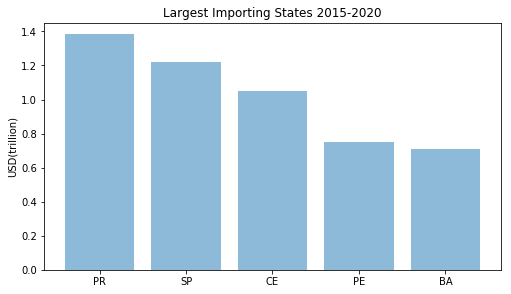

In [11]:
#states imports
statei = (comexstat_import['2015':'2020'].groupby('state')['usd'].sum()/1000000000).sort_values(ascending=False).head(5).tolist()
statei_plan = (comexstat_import['2015':'2020'].groupby('state')['usd'].sum().sort_values(ascending=False)/1000000000).head(5).index.tolist()
yi_pos = np.arange(len(statei_plan))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(yi_pos, statei, align='center', alpha=0.5)
plt.xticks(yi_pos, statei_plan, rotation=0)
plt.ylabel('USD(trillion)')
plt.title('Largest Importing States 2015-2020')

In [12]:
#export
comexstat_export=comexstat[(comexstat.type =='Export')]
comexstat_export.to_csv('comexstat_export.csv', index=False)
comexstat_export = pd.read_csv('comexstat_export.csv', parse_dates=['date'],index_col='date', )
comexstat_export.index.name = None

Text(0.5, 1.0, 'Largest Exporting States 2017')

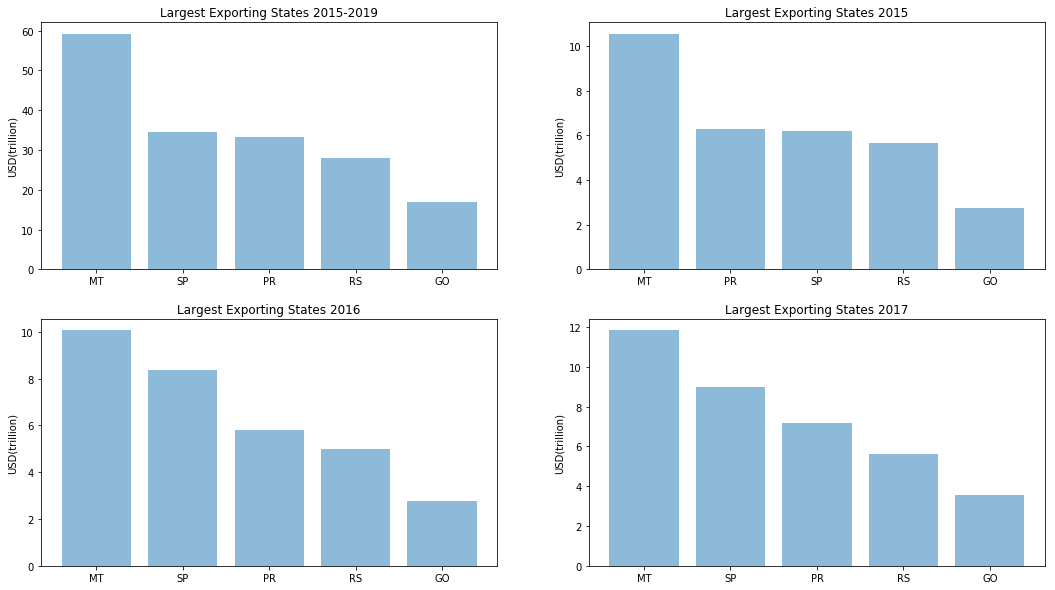

In [13]:
#states exports
statee1 = (comexstat_export['2015':'2020'].groupby('state')['usd'].sum()/1000000000).sort_values(ascending=False).head(5).tolist()
statee_plan1 = (comexstat_export['2015':'2020'].groupby('state')['usd'].sum().sort_values(ascending=False)/1000000000).head(5).index.tolist()
ye_pos1 = np.arange(len(statee_plan1))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(ye_pos1, statee1, align='center', alpha=0.5)
plt.xticks(ye_pos1, statee_plan1, rotation=0)
plt.ylabel('USD(trillion)')
plt.title('Largest Exporting States 2015-2019')

statee2 = (comexstat_export['2015'].groupby('state')['usd'].sum()/1000000000).sort_values(ascending=False).head(5).tolist()
statee_plan2 = (comexstat_export['2015'].groupby('state')['usd'].sum().sort_values(ascending=False)/1000000000).head(5).index.tolist()
ye_pos2 = np.arange(len(statee_plan2))
plt.subplot(222)
plt.bar(ye_pos2, statee2, align='center', alpha=0.5)
plt.xticks(ye_pos2, statee_plan2, rotation=0)
plt.ylabel('USD(trillion)')
plt.title('Largest Exporting States 2015')

statee3 = (comexstat_export['2016'].groupby('state')['usd'].sum()/1000000000).sort_values(ascending=False).head(5).tolist()
statee_plan3 = (comexstat_export['2016'].groupby('state')['usd'].sum().sort_values(ascending=False)/1000000000).head(5).index.tolist()
ye_pos3 = np.arange(len(statee_plan3))
plt.subplot(223)
plt.bar(ye_pos3, statee3, align='center', alpha=0.5)
plt.xticks(ye_pos3, statee_plan3, rotation=0)
plt.ylabel('USD(trillion)')
plt.title('Largest Exporting States 2016')

statee4 = (comexstat_export['2017'].groupby('state')['usd'].sum()/1000000000).sort_values(ascending=False).head(5).tolist()
statee_plan4 = (comexstat_export['2017'].groupby('state')['usd'].sum().sort_values(ascending=False)/1000000000).head(5).index.tolist()
ye_pos4 = np.arange(len(statee_plan4))
plt.subplot(224)
plt.bar(ye_pos4, statee4, align='center', alpha=0.5)
plt.xticks(ye_pos4, statee_plan4, rotation=0)
plt.ylabel('USD(trillion)')
plt.title('Largest Exporting States 2017')

Text(0.5, 1.0, 'Largest Exporting States 2019')

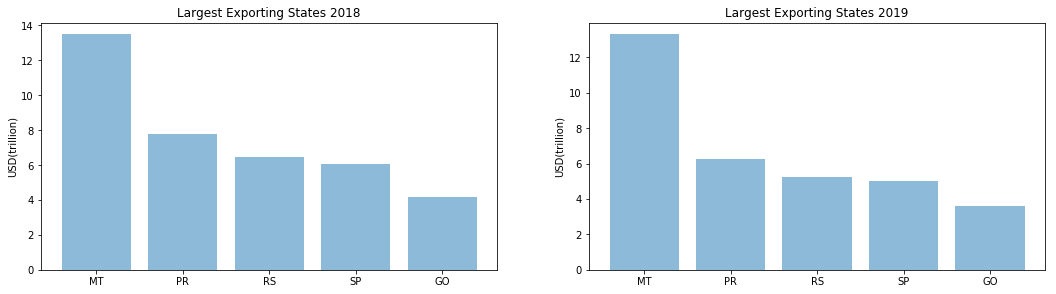

In [14]:
statee5 = (comexstat_export['2018'].groupby('state')['usd'].sum()/1000000000).sort_values(ascending=False).head(5).tolist()
statee_plan5 = (comexstat_export['2018'].groupby('state')['usd'].sum().sort_values(ascending=False)/1000000000).head(5).index.tolist()
ye_pos5 = np.arange(len(statee_plan5))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(ye_pos5, statee5, align='center', alpha=0.5)
plt.xticks(ye_pos5, statee_plan5, rotation=0)
plt.ylabel('USD(trillion)')
plt.title('Largest Exporting States 2018')

statee6 = (comexstat_export['2019'].groupby('state')['usd'].sum()/1000000000).sort_values(ascending=False).head(5).tolist()
statee_plan6 = (comexstat_export['2019'].groupby('state')['usd'].sum().sort_values(ascending=False)/1000000000).head(5).index.tolist()
ye_pos6 = np.arange(len(statee_plan6))
plt.subplot(222)
plt.bar(ye_pos6, statee6, align='center', alpha=0.5)
plt.xticks(ye_pos6, statee_plan6, rotation=0)
plt.ylabel('USD(trillion)')
plt.title('Largest Exporting States 2019')

Text(0.5, 1.0, 'Largest Exporting Products 2017')

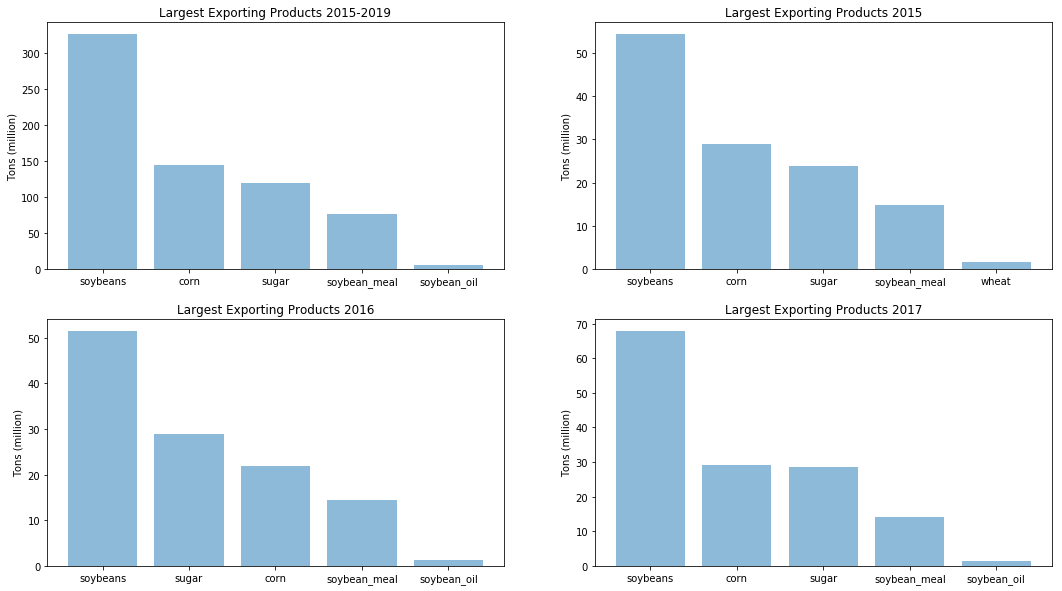

In [15]:
#product exports
prode1 = (comexstat_export['2015':'2020'].groupby('product')['tons'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
prod_plan1 = (comexstat_export['2015':'2020'].groupby('product')['tons'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
yp_pos1 = np.arange(len(prod_plan1))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(yp_pos1, prode1, align='center', alpha=0.5)
plt.xticks(ye_pos1, prod_plan1, rotation=0)
plt.ylabel('Tons (million)')
plt.title('Largest Exporting Products 2015-2019')

prode2 = (comexstat_export['2015'].groupby('product')['tons'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
prod_plan2 = (comexstat_export['2015'].groupby('product')['tons'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
yp_pos2 = np.arange(len(prod_plan2))
plt.subplot(222)
plt.bar(yp_pos2, prode2, align='center', alpha=0.5)
plt.xticks(ye_pos2, prod_plan2, rotation=0)
plt.ylabel('Tons (million)')
plt.title('Largest Exporting Products 2015')

prode3 = (comexstat_export['2016'].groupby('product')['tons'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
prod_plan3 = (comexstat_export['2016'].groupby('product')['tons'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
yp_pos3 = np.arange(len(prod_plan3))
plt.subplot(223)
plt.bar(yp_pos3, prode3, align='center', alpha=0.5)
plt.xticks(ye_pos3, prod_plan3, rotation=0)
plt.ylabel('Tons (million)')
plt.title('Largest Exporting Products 2016')

prode4 = (comexstat_export['2017'].groupby('product')['tons'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
prod_plan4 = (comexstat_export['2017'].groupby('product')['tons'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
yp_pos4 = np.arange(len(prod_plan4))
plt.subplot(224)
plt.bar(yp_pos4, prode4, align='center', alpha=0.5)
plt.xticks(ye_pos4, prod_plan4, rotation=0)
plt.ylabel('Tons (million)')
plt.title('Largest Exporting Products 2017')

Text(0.5, 1.0, 'Largest Exporting Products 2019')

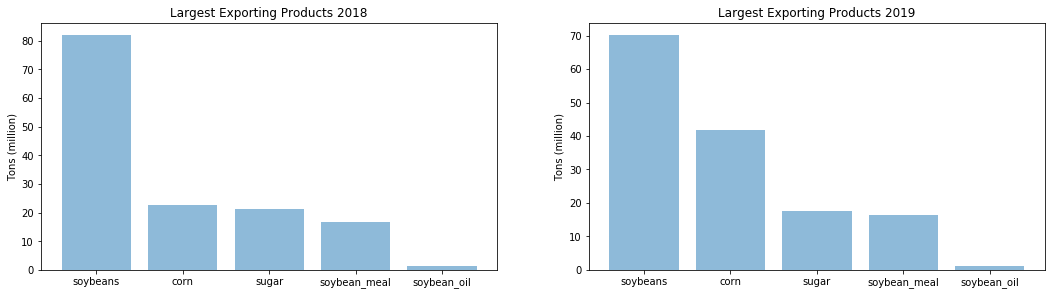

In [16]:
prode5 = (comexstat_export['2018'].groupby('product')['tons'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
prod_plan5 = (comexstat_export['2018'].groupby('product')['tons'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
yp_pos5 = np.arange(len(prod_plan5))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(yp_pos5, prode5, align='center', alpha=0.5)
plt.xticks(ye_pos5, prod_plan5, rotation=0)
plt.ylabel('Tons (million)')
plt.title('Largest Exporting Products 2018')

prode6 = (comexstat_export['2019'].groupby('product')['tons'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
prod_plan6 = (comexstat_export['2019'].groupby('product')['tons'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
yp_pos6 = np.arange(len(prod_plan6))
plt.subplot(222)
plt.bar(yp_pos6, prode6, align='center', alpha=0.5)
plt.xticks(ye_pos6, prod_plan6, rotation=0)
plt.ylabel('Tons (million)')
plt.title('Largest Exporting Products 2019')

In [17]:
#most important products exported by Brazil in the last 5 years
#China, Netherlands, Iran;
(comexstat_export['2015':'2020'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
China          99.822558
Netherlands     8.949243
Iran            8.497975
Spain           6.283976
Thailand        6.216738
Name: usd, dtype: float64

In [18]:
(comexstat_export['2015'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
China          16.721284
Netherlands     1.998707
Vietnam         1.400081
Iran            1.273025
Spain           1.215137
Name: usd, dtype: float64

In [19]:
(comexstat_export['2016'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
China          15.414830
Netherlands     1.785786
Iran            1.737373
India           1.264078
Indonesia       1.245250
Name: usd, dtype: float64

In [20]:
(comexstat_export['2017'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
China          20.675322
Netherlands     1.785492
Iran            1.711467
Bangladesh      1.347747
Spain           1.319968
Name: usd, dtype: float64

In [21]:
(comexstat_export['2018'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
China          27.267814
Iran            1.856926
Netherlands     1.813924
Thailand        1.388064
Spain           1.342477
Name: usd, dtype: float64

In [22]:
(comexstat_export['2019'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
China          19.743307
Iran            1.919185
Spain           1.571507
Netherlands     1.565334
Japan           1.436591
Name: usd, dtype: float64

In [23]:
#the most important trade partners for Brazil in terms of ‘corn’ and ‘sugar’ in the last 3 years
#import
corn=comexstat[(comexstat['product'] =='corn')&(comexstat.type =='Export')]
corn.to_csv('corn.csv', index=False)
corn = pd.read_csv('corn.csv', parse_dates=['date'],index_col='date', )
corn.index.name = None

sugar=comexstat[(comexstat['product'] =='sugar')&(comexstat.type =='Export')]
sugar.to_csv('sugar.csv', index=False)
sugar = pd.read_csv('sugar.csv', parse_dates=['date'],index_col='date', )
sugar.index.name = None

In [24]:
#corn - 2015-2019
(corn['2015':'2020'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
Iran           4.355009
Vietnam        2.861495
Japan          2.491581
Egypt          1.960180
South Korea    1.779314
Name: usd, dtype: float64

In [25]:
#corn - 2019
(corn['2019'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Japan          1082.350215
Iran            943.665065
Vietnam         648.134446
South Korea     565.388297
Egypt           543.123377
Name: usd, dtype: float64

In [26]:
#corn - 2018
(corn['2018'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Iran        1096.062061
Vietnam      490.681604
Spain        377.941617
Egypt        331.566446
Malaysia     205.988506
Name: usd, dtype: float64

In [27]:
#corn - 2017
(corn['2017'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Iran       782.609155
Egypt      500.375313
Japan      451.950806
Spain      436.927252
Vietnam    412.219158
Name: usd, dtype: float64

In [28]:
#corn - 2016
(corn['2016'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Iran           795.990284
Vietnam        479.473760
Japan          455.424226
Malaysia       272.436166
South Korea    249.832584
Name: usd, dtype: float64

In [29]:
#corn - 2015
(corn['2015'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Vietnam        830.986073
Iran           736.682660
South Korea    504.913907
Japan          461.180894
Taiwan         373.492723
Name: usd, dtype: float64

In [30]:
#sugar - 2015-2019
(sugar['2015':'2020'].groupby('country')['usd'].sum()/1000000000).sort_values(ascending=False).head(5)

country
Bangladesh              3.492419
Algeria                 3.400336
India                   3.038610
United Arab Emirates    2.552705
China                   2.328543
Name: usd, dtype: float64

In [31]:
#sugar - 2019
(sugar['2019'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Algeria         623.977094
Bangladesh      473.683659
Nigeria         407.294732
Saudi Arabia    395.616122
China           390.299264
Name: usd, dtype: float64

In [32]:
#corn - 2018
(corn['2018'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Iran        1096.062061
Vietnam      490.681604
Spain        377.941617
Egypt        331.566446
Malaysia     205.988506
Name: usd, dtype: float64

In [33]:
#corn - 2017
(corn['2017'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Iran       782.609155
Egypt      500.375313
Japan      451.950806
Spain      436.927252
Vietnam    412.219158
Name: usd, dtype: float64

In [34]:
#corn - 2016
(corn['2016'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Iran           795.990284
Vietnam        479.473760
Japan          455.424226
Malaysia       272.436166
South Korea    249.832584
Name: usd, dtype: float64

In [35]:
#corn - 2015
(corn['2015'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5)

country
Vietnam        830.986073
Iran           736.682660
South Korea    504.913907
Japan          461.180894
Taiwan         373.492723
Name: usd, dtype: float64

Text(0.5, 1.0, 'The Biggest Sugar Buyer 2015-2019')

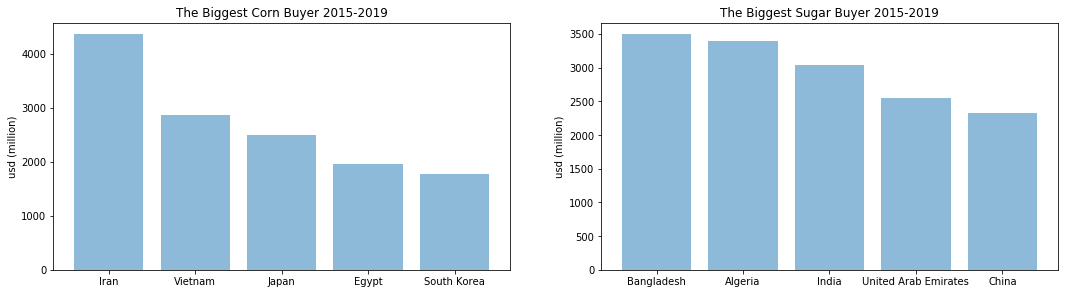

In [36]:
#Corn X Sugar
corn1 = (corn['2015':'2020'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
corn_plan1 = (corn['2015':'2020'].groupby('country')['usd'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
yc_pos1 = np.arange(len(corn_plan1))
plt.figure(figsize=(18,10))
plt.subplot(221)
plt.bar(yc_pos1, corn1, align='center', alpha=0.5)
plt.xticks(yc_pos1, corn_plan1, rotation=0)
plt.ylabel('usd (million)')
plt.title('The Biggest Corn Buyer 2015-2019')

#Corn X Sugar
sugar1 = (sugar['2015':'2020'].groupby('country')['usd'].sum()/1000000).sort_values(ascending=False).head(5).tolist()
sugar_plan1 = (sugar['2015':'2020'].groupby('country')['usd'].sum().sort_values(ascending=False)/1000000).head(5).index.tolist()
ys_pos1 = np.arange(len(sugar_plan1))
plt.subplot(222)
plt.bar(ys_pos1, sugar1, align='center', alpha=0.5)
plt.xticks(ys_pos1, sugar_plan1, rotation=0)
plt.ylabel('usd (million)')
plt.title('The Biggest Sugar Buyer 2015-2019')